## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousemetadataresults = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')
mousemetadataresults.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the DataFrame.
len(mousemetadataresults['Mouse ID'].unique())

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseduplicates = mousemetadataresults.loc[mousemetadataresults.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mouseduplicates

array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 

In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleanmousedata =  mousemetadataresults.loc[ mousemetadataresults['Mouse ID'] != 'g989']     
cleanmousedata = pd.DataFrame(cleanmousedata)
cleanmousedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.

len(cleanmousedata['Mouse ID'].unique())

248

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

tumorvolumestats = cleanmousedata.groupby(["Drug Regimen"])
tumorvolumestats

# Computation for the mean of each regimen
regimen_mean = tumorvolumestats["Tumor Volume (mm3)"].mean()

# Computation for the median of each regimen
regimen_median = tumorvolumestats["Tumor Volume (mm3)"].median()

# Computation for the variance of each regimen
regimen_variance = tumorvolumestats["Tumor Volume (mm3)"].var()

# Computation for the standard deviation of each regimen
regimen_std = tumorvolumestats["Tumor Volume (mm3)"].std()

# Computation for the SEM
regimen_sem = tumorvolumestats["Tumor Volume (mm3)"].sem()

tumorsummary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})
tumorsummary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

tumorvolumestats = cleanmousedata.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'std', 'sem']})
tumorvolumestats


Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar Plots

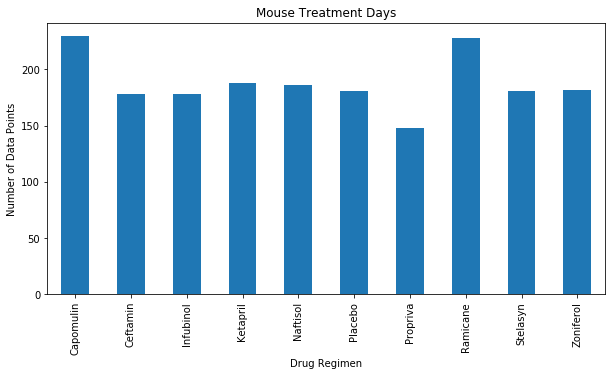

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

datapoints = cleanmousedata.groupby(["Drug Regimen"]).count()["Mouse ID"]
datapoints

datapoints.plot(kind="bar", figsize=(10,5))

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Data Points')

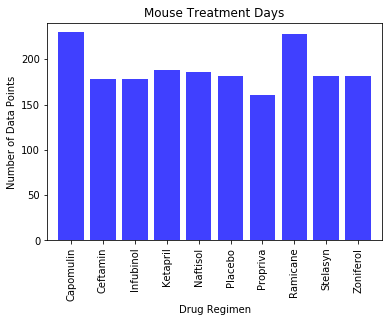

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(datapoints))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

In [21]:
# Gender Statistitics

genderpie = cleanmousedata.groupby(['Sex', 'Mouse ID']).size()
genderpie = pd.DataFrame(genderpie.groupby(['Sex']).count())
genderpie.columns = ['Total Gender Count']
genderpie['% of Gender'] = (100*(genderpie['Total Gender Count']/genderpie['Total Gender Count'].sum()))
genderpie

,Total Gender Count,% of Gender
Sex,,
Female,123,49.596774
Male,125,50.403226


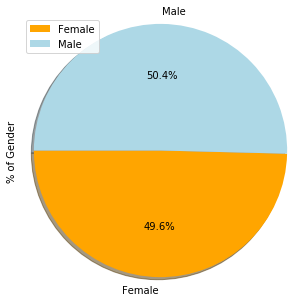

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

labels = ["Female", "Male"]
colors = ["orange", "lightblue"]
explode = (0.1, 0)

plot = genderpie.plot.pie(y='% of Gender', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()

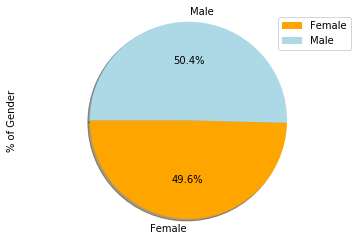

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
percent = [49.596774, 50.403226]
colors = ["orange", "lightblue"]
explode = (0.0, 0)

plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.legend(loc="best")
plt.ylabel("% of Gender")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

maxtumor = cleanmousedata.groupby(["Mouse ID"]).max().reset_index()

mergedataframe = pd.merge(maxtumor[["Mouse ID", "Timepoint"]], cleanmousedata, how = 'left', on = ['Mouse ID', 'Timepoint'])
mergedataframe



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [48]:
capomulin = mergedataframe.loc[mergedataframe["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
capomulin

capomulinquartile = capomulin.quantile([0.25, 0.5, 0.75]) 

capomulinlowerq = capomulinquartile[0.25]
capomulinupperq = capomulinquartile[0.75]
capomuliniqr = upperq-lowerq

capomulin_lower_bound = capomulinlowerq - (1.5*capomuliniqr)
capomulin_upper_bound = capomulinupperq + (1.5*capomuliniqr)

capomulinquartile

print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < capomulin_lower_bound) | (capomulin > capomulin_upper_bound)]}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [54]:
ramicane = mergedataframe.loc[mergedataframe["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
ramicane

ramicanequartile = ramicane.quantile([0.25, 0.5, 0.75]) 

ramicanelowerq = ramicanequartile[0.25]
ramicaneupperq = ramicanequartile[0.75]
ramicaneiqr = ramicaneupperq-ramicanelowerq

ramicane_lower_bound = ramicanelowerq - (1.5*ramicaneiqr)
ramicane_upper_bound = ramicaneupperq + (1.5*ramicaneiqr)

ramicanequartile

print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ramicane_lower_bound) | (ramicane > ramicane_upper_bound)]}")


Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [89]:
infubinol = mergedataframe.loc[mergedataframe["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
infubinol

infubinolquartile = infubinol.quantile([0.25, 0.5, 0.75]) 

infubinollowerq = infubinolquartile[0.25]
infubinolupperq = infubinolquartile[0.75]
infubinoliqr = infubinolupperq-infubinollowerq

infubinol_lower_bound = infubinollowerq - (1.5*infubinoliqr)
infubinol_upper_bound = infubinolupperq + (1.5*infubinoliqr)

infubinolquartile

print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < infubinol_lower_bound) | (infubinol > infubinol_upper_bound)]}")


Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [90]:
ceftamin = mergedataframe.loc[mergedataframe["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
ceftamin

ceftaminquartile = ceftamin.quantile([0.25, 0.5, 0.75]) 

ceftaminlowerq = ceftaminquartile[0.25]
ceftaminupperq = ceftaminquartile[0.75]
ceftaminiqr = ceftaminupperq-ceftaminlowerq

ceftamin_lower_bound = ceftaminlowerq - (1.5*ceftaminiqr)
ceftamin_upper_bound = ceftaminupperq + (1.5*ceftaminiqr)

ceftaminquartile

print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < ceftamin_lower_bound) | (ceftamin > ceftamin_upper_bound)]}")


Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


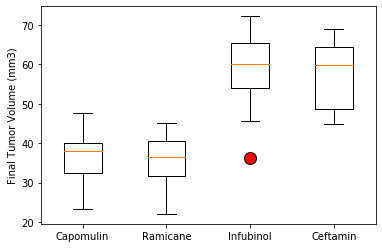

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


finaltumorplot = [capomulin, ramicane, infubinol, ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')


orange_out = dict(markerfacecolor='red',markersize=12)

ax1.boxplot(finaltumorplot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",], flierprops=orange_out)

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [97]:
lineandscattercap = capomulin.loc[capomulin["Mouse ID"] == "b128"]
lineandscattercap.head()

KeyError: 'Mouse ID'

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axisTP = lineandscattercap["Timepoint"]
tumsize = lineandscattercap["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsize,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

NameError: name 'lineandscattercap' is not defined

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
